## Clustering project - K-means
### Using elbow method to choose optimal number of clusters

In [30]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [31]:
dfs=pd.read_csv('spending.csv')

In [32]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(2)
memory usage: 3.2 KB


In [33]:
dfs.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Text(0.5, 1.0, 'Visualize spending')

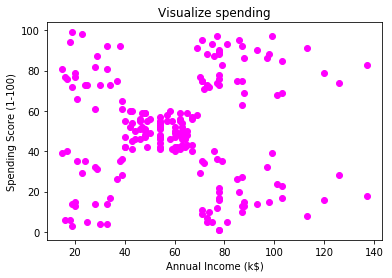

In [37]:
plt.scatter(dfs['Annual Income (k$)'],dfs['Spending Score (1-100)'],color="magenta")
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Visualize spending')

In [39]:
x_columns = 2
x = dfs.iloc[:, 0:x_columns].values

In [42]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2, random_state=0)
y = model.fit_predict(x)

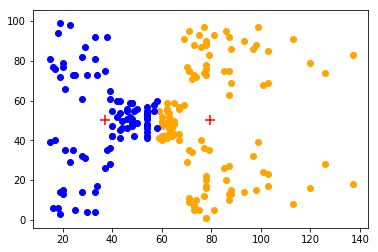

In [43]:
colors = ['orange', 'blue'] 
for i in range(2):
    plt.scatter(x[y == i, 0], x[y == i, 1], c=colors[i])
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], color='red', marker='+', s=100)

Text(0, 0.5, 'SSE')

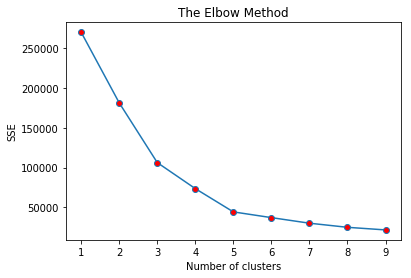

In [90]:
from sklearn.cluster import KMeans
scores = []
for i in range(1, 10):
    model_2= KMeans(n_clusters=i, random_state=0)
    model_2.fit(x)
    scores.append(model_2.inertia_)

import matplotlib.pyplot as plt
plt.plot(range(1, 10), scores, marker=".", markerfacecolor='red', markersize=12)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')


Elbow method suggests 5 clusters will be optimal for this dataset. Re-run K-means with 5 clusters

In [55]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5, random_state=0)
y = model.fit_predict(x)

In [61]:
centers=model.cluster_centers_
centers

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

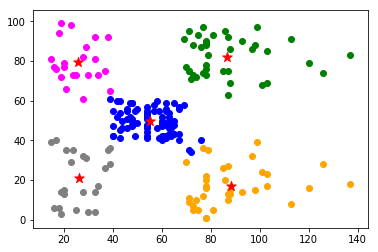

In [85]:
colors = ['orange', 'blue','green','magenta','grey'] 
for i in range(5):
    plt.scatter(x[y == i, 0], x[y == i, 1], c=colors[i])
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1],
            color='red', marker='*', s=100)

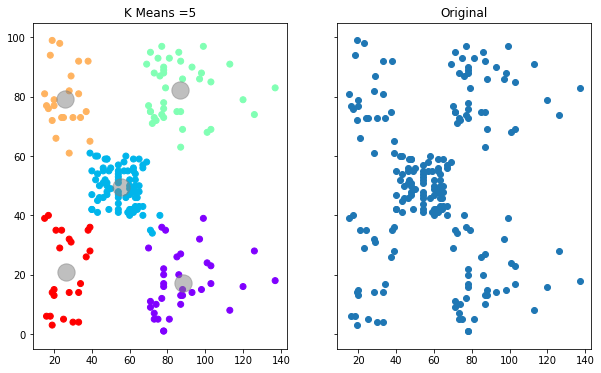

In [84]:
f, (ax1, ax2)= plt.subplots(nrows=1, ncols=2, sharey = True, figsize =(10,6))
ax1.set_title("K Means =5")
ax1.scatter(x[:, 0], x[:, 1], c=model.labels_, cmap='rainbow')
ax1.scatter(x=centers[:, 0], y=centers[:, 1], c='grey', s=300, alpha=0.5);

ax2.set_title("Original")
ax2.scatter(x=dfs['Annual Income (k$)'],y=dfs['Spending Score (1-100)'])

  